In [15]:
import torch
import os
import sys
import yaml
from utils import plot_loss, compute_test_metrics
os.chdir("/Users/anarivera/Documents/Projects/ai-accelerating-uc") # TODO: fix this later
from src.models.simple_mlp import SimpleMLP
from src.datasets.simple_dataset import SimpleDataset
from torch.utils.data import Subset, DataLoader

In [16]:
results_dir = "results/simple_no_round/20251114_104110"

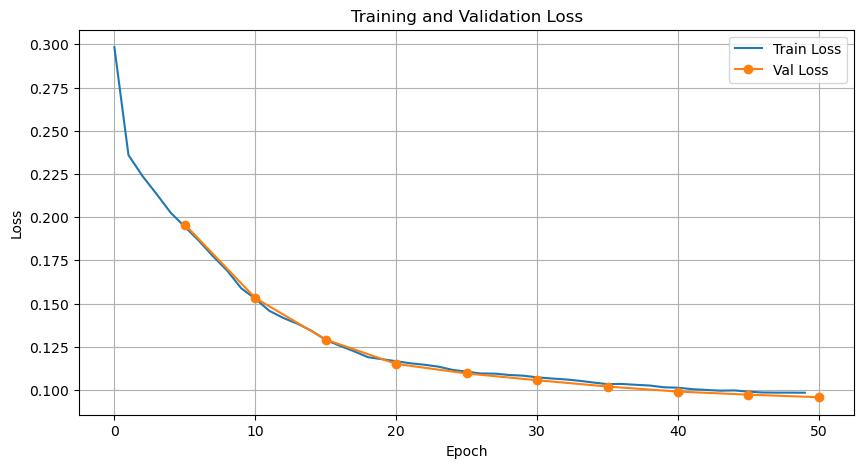

In [17]:
# Plot training loss and validation loss
losses = torch.load(os.path.join(results_dir, "losses.pt"))
plot_loss(losses["train_losses"], losses["val_losses"])

In [ ]:
# Set up test dataloader
test_indices = torch.load(os.path.join(results_dir, "test_indices.pt"))
full_dataset = SimpleDataset(data_dir = "data/starting_kit/Train_Data")
test_dataset = Subset(full_dataset, test_indices)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

In [20]:
# Load the saved model
model = torch.load(os.path.join(results_dir, "simple_mlp_model.pt"), weights_only=False)
test_metrics = compute_test_metrics(model, test_loader)

In [21]:
test_metrics

{'precision': 0.7859776463173423,
 'recall': 0.7890454503774554,
 'f1_score': 0.7875085556382945}

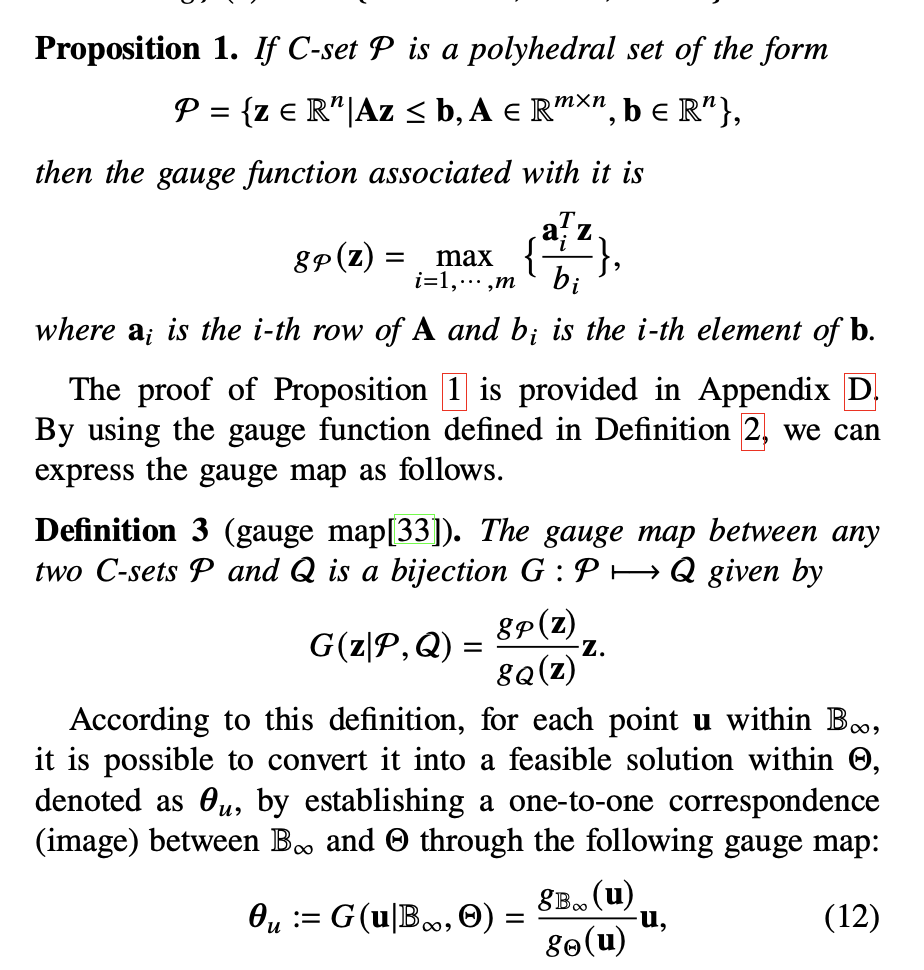

In [ ]:
import torch
import numpy as np

def gauge_map(A: torch.Tensor, b: torch.Tensor, z: torch.Tensor) -> torch.Tensor:
    """
    A: m x n (constraint matrix)
    b: m x 1 (constrant vector)
    z: n x k (k input vectors from the unit cube in n dimensions)

    Returns a n x k tensor, where the i^th column is the
    gauge map of the i^th input vector.
    """

    def _compute_gauge(A, b, z):
        return torch.max(torch.div(A@z, b),dim = 0).values
    
    gamma_dest = _compute_gauge(A, b, z)
    gamma_start = torch.linalg.norm(z, ord = np.inf, dim=0)
    return z @ torch.diag(gamma_start/gamma_dest)

A = np.array([[1., 1.], [-1., 2.], [2., 1.], [-1., -1.], [1., -2.], [-2., -1.]])
b = np.array([[1.], [2.], [2.], [1.], [1.], [1.]])
z = np.array([[0.5, 1.0], [1, 1], [2,3]]).T
gauge_map(torch.tensor(A), torch.tensor(b), torch.tensor(z))


test = torch.tensor(np.random.uniform(-1, 1, (2, 100000)), dtype=torch.double)
out = gauge_map(torch.tensor(A), torch.tensor(b), test).detach().numpy()
     

In [1]:
import os
os.chdir("..")
print(os.getcwd())

/Users/wikum/Repositories/ai-ccelerating-uc-agent


In [ ]:
def validate(json_str):
    data = json.loads(json_str)
    no_wind_solar = {g: data["Generators"][g] for (g, _) in data["Generators"].items() if g not in ["wind", "solar"]}
    no_wind_solar = {}
    return no_wind_solar

import gzip, json
val_obj = None
for instance in sorted(os.listdir("data/")):
    print(instance)
    if not instance.startswith("instance_"):
        continue
    input_data_json = os.path.join("data/", instance, "InputData.json.gz")
    with gzip.open(input_data_json, 'r') as f:
        new_json = f.read()
        if val_obj is not None:
            print(val_obj, validate(new_json))
            assert validate(new_json) == val_obj, f"{instance} is different."
            print(instance)
        if val_obj is None:
            val_obj = validate(new_json)


.DS_Store
instance_2021_Q1_1
instance_2021_Q1_10
{'gen_ba952ad5': {'Bus': 'b1', 'Type': 'Profiled', 'Cost ($/MW)': 0, 'Minimum power (MW)': 0, 'Maximum power (MW)': 21.0}, 'gen_317dbf10': {'Bus': 'b1', 'Type': 'Profiled', 'Cost ($/MW)': 0, 'Minimum power (MW)': 0, 'Maximum power (MW)': 22.0}, 'gen_d30a2d0f': {'Bus': 'b1', 'Type': 'Profiled', 'Cost ($/MW)': 0, 'Minimum power (MW)': 0, 'Maximum power (MW)': 19.0}, 'gen_2d6ce3de': {'Bus': 'b1', 'Type': 'Profiled', 'Cost ($/MW)': 0, 'Minimum power (MW)': 0, 'Maximum power (MW)': 24.0}, 'gen_83802dcb': {'Bus': 'b1', 'Type': 'Thermal', 'Production cost curve (MW)': [120.0, 200.0, 320.0, 380.0, 431.0], 'Production cost curve ($)': [9266.68067, 13312.30891, 19490.73249, 22788.45032, 25619.26355], 'Startup costs ($)': [11456.376], 'Startup delays (h)': [4.0], 'Ramp up limit (MW)': 529.8, 'Ramp down limit (MW)': 742.8000000000001, 'Startup limit (MW)': 529.8, 'Shutdown limit (MW)': 742.8000000000001, 'Minimum downtime (h)': 4.0, 'Minimum uptime 

AssertionError: instance_2021_Q1_10 is different.